We'll start off by importing the main PyTorch package along with the *Variable* class used to store our data tensors and the *nn* package which we will use when building the model. In addition, we'll only be using numpy to pre-process our data as Torch works really well with numpy.


Bad key "text.kerning_factor" on line 4 in
C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


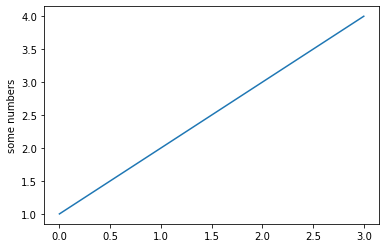

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [125]:
#https://datatofish.com/confusion-matrix-python/

import pandas as pd
#from pandas_ml import ConfusionMatrix

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

print(len(data['y_Actual']), len(data['y_Predicted']))

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df.head())

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
confusion_matrix.style

12 12
   y_Actual  y_Predicted
0         1            1
1         0            1
2         0            0
3         1            1
4         0            0
Predicted  0  1
Actual         
0          5  2
1          1  4


Predicted,0,1
Actual,,
0,5,2
1,1,4


In [70]:
# https://pytorch.org/get-started/locally/#mac-anaconda
# conda install pytorch torchvision cudatoolkit=10.2 -c pytorch
import torch
from torch import nn
import numpy as np
import datetime

# Create dammy train test set

create to typ of x^3 data sets predicting the next 2 point

[0.23309093 0.45164794 0.05867559 0.48031216]
[ 0.46153371 -0.15806776 -0.22464431  3.21391268]
[ 1.98233027  0.42121132 -1.81317508 -2.03645184]
[-0.79195265 -0.70955964 -2.82003918  0.28133835]
[[ 0.          0.1         0.3         0.5       ]
 [ 0.5        -0.2        -0.2         3.        ]
 [ 2.          0.3        -1.5        -2.        ]
 ...
 [ 0.37721847 -0.19278121  0.08896957  2.58344273]
 [ 2.04513343  0.19070594 -1.10348105 -2.29168139]
 [-0.64605173 -0.40244924 -2.68544393  0.20519928]]
[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0

C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


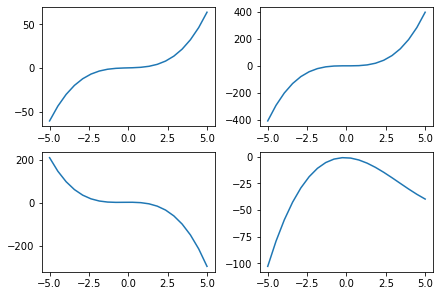

In [96]:
#import pandas as pd
import glob, os
import pprint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, b, c, d):
    ''' ~x^3 curve     '''
    return a + b * x + c * x * x + d * pow(x,3)


Pos = [ [0, 0.1 , 0.3, 0.5],
        [0.5, -0.2 , -0.2, 3],
       [2, 0.3, -1.5, -2],
       [-0.5, -0.7, -3, 0.1]]

out = [1 ,1 , 0 , 0]
   
npPos = np.array(Pos)
npOut = np.array(out)

noise = np.random.normal(size=(4,4)) / 5
npPos1 = npPos+noise

#https://matplotlib.org/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
xData = np.linspace(-5, 5, 20)
for V, ax in zip(npPos1, f1_axes.flat):
    print(V)
    yData = func(xData, *V)
    ax.plot(xData, yData)
    #ax.set_xlabel(str(V))
fig1.show()


XtrainData = npPos
YtrainData = npOut
for ii in range(100):
    noise = np.random.normal(size=(4,4)) / 5
    npPos1 = npPos+noise
    XtrainData = np.concatenate((XtrainData, npPos1), axis=0)
    YtrainData = np.concatenate((YtrainData, npOut ), axis=0)
    
print(XtrainData)
print(YtrainData)

    


In [53]:
runAllCells = False

As we're going to predict the next character in the sequence at each time step, we'll have to divide each sentence into

- Input data
    - The last input character should be excluded as it does not need to be fed into the model
- Target/Ground Truth Label
    - One time-step ahead of the Input data as this will be the "correct answer" for the model at each time step corresponding to the input data

Since we're done with all the data pre-processing, we can now move the data from numpy arrays to PyTorch's very own data structure - **Torch Tensors**

In [48]:
input_seq = torch.from_numpy(XtrainData)
target_seq = torch.Tensor(YtrainData)

In [49]:
print(input_seq.shape, input_seq.shape[0])
print(target_seq.shape)

torch.Size([16, 4]) 16
torch.Size([16])


Now we've reached the fun part of this project! We'll be defining the model using the Torch library, and this is where you can add or remove layers, be it fully connected layers, convolutational layers, vanilla RNN layers, LSTM layers, and many more! In this post, we'll be using the basic nn.rnn to demonstrate a simple example of how RNNs can be used.

Before we start building the model, let's use a build in feature in PyTorch to check the device we're running on (CPU or GPU). This implementation will not require GPU as the training is really simple. However, as you progress on to large datasets and models with millions of trainable parameters, using the GPU will be very important to speed up your training.

In [68]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [71]:
dateNow = datetime.datetime.now()
print(dateNow)

2020-08-23 11:46:44.008501


In [72]:
# Random data

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 10, 10, 1

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [97]:
# change numpy representation to float and conver to pytorch tensor
x = torch.from_numpy(XtrainData.astype(np.float32))
y = torch.from_numpy(YtrainData.astype(np.float32))
# add a Dimension
y = y.unsqueeze(1)

print(x.shape, y.shape)

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = x.shape[0], 4, 4, 1


torch.Size([404, 4]) torch.Size([404, 1])


In [98]:
# source: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules

# -*- coding: utf-8 -*-
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
#N, D_in, H, D_out = 64, 10, 10, 1

# Create random Tensors to hold inputs and outputs
#x = torch.randn(N, D_in)
#y = torch.randn(N, D_out)

# move to device 
x = x.to(device)
y = y.to(device) 

print(f"input dim {x.shape}")
print(f"Input {x[0,:]} -> output {y[0]}")

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)
model = model.to(device)


#print the model
print(model)
modelParameters = sum([param.nelement() for param in model.parameters()])
print('Num Model Parameters ', modelParameters )

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 200 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    



input dim torch.Size([404, 4])
Input tensor([0.0000, 0.1000, 0.3000, 0.5000], device='cuda:0') -> output tensor([1.], device='cuda:0')
TwoLayerNet(
  (linear1): Linear(in_features=4, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
Num Model Parameters  25
99 4.782670497894287
299 1.8459484577178955
499 1.6288139820098877
699 1.5125527381896973
899 1.436309576034546
Hyp 0.9891024827957153 : Real Out 1.0
Hyp 1.00047767162323 : Real Out 1.0
Hyp -0.0007028281688690186 : Real Out 0.0
Hyp -0.010086268186569214 : Real Out 0.0
Hyp 1.0226119756698608 : Real Out 1.0
Hyp 1.002943515777588 : Real Out 1.0
Hyp 0.12553495168685913 : Real Out 0.0
Hyp 0.09721928834915161 : Real Out 0.0
Hyp 1.0206334590911865 : Real Out 1.0
Hyp 1.0409222841262817 : Real Out 1.0
Hyp -0.020735979080200195 : Real Out 0.0
Hyp 0.09039703011512756 : Real Out 0.0
Hyp 0.9545400142669678 : Real Out 1.0
Hyp 1.0015513896942139 : Real Out 1.0
Hyp -0.06005096435546875 : Real Out 0.0
Hyp -0.

In [158]:



y = y.to('cpu')
npActual    = list(torch.squeeze(y).numpy())


# evaluate
out = model(x)
out = out.to('cpu')
out = torch.squeeze((out)) 
npPredicted = out.detach().numpy()
npPredicted[npPredicted>0.5]  = 1
npPredicted[npPredicted<=0.5] = 0

data = {'y_Actual':    npActual,
        'y_Predicted': list(npPredicted)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df.head())


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
confusion_matrix.style

   y_Actual  y_Predicted
0       1.0          1.0
1       1.0          1.0
2       0.0          0.0
3       0.0          0.0
4       1.0          1.0
Predicted  0.0  1.0
Actual             
0.0        202    0
1.0          0  202


Predicted,0.0,1.0
Actual,,
0.0,202,0
1.0,0,202


In [162]:
XEvalData = npPos
YEvalData = npOut
for ii in range(99):
    noise = np.random.normal(size=(4,4)) #/ 5
    npPos1 = npPos+noise
    XEvalData = np.concatenate((XEvalData, npPos1), axis=0)
    YEvalData = np.concatenate((YEvalData, npOut ), axis=0)


# evaluate
x = torch.from_numpy(XEvalData.astype(np.float32))
x = x.to(device)
out = model(x)
out = out.to('cpu')
out = torch.squeeze((out)) 
npPredicted = out.detach().numpy()
npPredicted[npPredicted>0.5]  = 1
npPredicted[npPredicted<=0.5] = 0

data = {'y_Actual':    list(YEvalData),
        'y_Predicted': list(npPredicted)
        }
print(len(data['y_Actual']), len(data['y_Predicted']))


df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df.head())


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
confusion_matrix.style

400 400
   y_Actual  y_Predicted
0         1          1.0
1         1          1.0
2         0          0.0
3         0          0.0
4         1          1.0
Predicted  0.0  1.0
Actual             
0          170   30
1            4  196


Predicted,0.0,1.0
Actual,,
0,170,30
1,4,196


To start building our own neural network model, we can define a class that inherits PyTorch’s base class (nn.module) for all neural network modules. After doing so, we can start defining some variables and also the layers for our model under the constructor. For this model, we’ll only be using 1 layer of RNN followed by a fully connected layer. The fully connected layer will be in-charge of converting the RNN output to our desired output shape.

We’ll also have to define the forward pass function under forward() as a class method. The order the forward function is sequentially executed, therefore we’ll have to pass the inputs and the zero-initialized hidden state through the RNN layer first, before passing the RNN outputs to the fully-connected layer. Note that we are using the layers that we defined in the constructor.

The last method that we have to define is the method that we called earlier to initialize the hidden state - init_hidden(). This basically creates a tensor of zeros in the shape of our hidden states.

In [51]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        #Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
         # We'll send the tensor holding the hidden state to the device we specified earlier as well
        return hidden

After defining the model above, we'll have to instantiate the model with the relevant parameters and define our hyperparamters as well. The hyperparameters we're defining below are:

- *n_epochs*: Number of Epochs --> This refers to the number of times our model will go through the entire training dataset
- *lr*: Learning Rate --> This affects the rate at which our model updates the weights in the cells each time backpropogation is done
    - A smaller learning rate means that the model changes the values of the weight with a smaller magnitude
    - A larger learning rate means that the weights are updated to a larger extent for each time step

Similar to other neural networks, we have to define the optimizer and loss function as well. We’ll be using CrossEntropyLoss as the final output is basically a classification task.

In [54]:
if runAllCells:

    #Returns the index of a currently selected device.
    print(f"Currently selected device {torch.cuda.current_device()}")

    print(f"Returns the number of GPUs available {torch.cuda.device_count()}")
    del model
    torch.cuda.empty_cache()


In [55]:
import os
def saveModel(testDes, model, epoch, loss):
    basePath = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput"
    dir = os.path.join(basePath, testDes, str(epoch))
    #print(dir)
    if not os.path.exists(dir):
        os.makedirs(dir)   
    fileName = dir+"\\modelNN.pt"
    print(f"saving {fileName}")
    torch.save(model, fileName)
    
    outFile = open(dir+'\\loss.txt', 'w')
    outFile.write(f"{loss}\n")
    outFile.close()

In [56]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=200, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model = model.to(device)

# Define hyperparameters
n_epochs = 4
lr=0.001

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss(ignore_index=char2int[ignoreChar])
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

NameError: name 'dict_size' is not defined

In [57]:
#print the model
print(model)
modelParameters = sum([param.nelement() for param in model.parameters()])
print('Num Model Parameters ', modelParameters )


NameError: name 'model' is not defined

Now we can begin our training! As we only have a few sentences, this training process is very fast. However, as we progress, larger datasets and deeper models mean that the input data is much larger and the number of parameters within the model that we have to compute is much more.

In [26]:

totSentences = input_seq.shape[0]
batchSize = 2000

testDes = "20200805_"+str(n_epochs)+"_"+str(batchSize)+"_"+str(lr)+"_P"+str(modelParameters)

# Training Run
#input_seq = input_seq.to(device)
for epoch in range(1, n_epochs + 1):
    
    totLoss = 0
    batchNo = 0
    for start in range(0, totSentences, batchSize):
    
        # get batch data
        batchNo += 1
        batch_input_seq  = input_seq[start:start+batchSize,  :, :]
        batch_target_seq = target_seq[start:start+batchSize, :   ]
    
        optimizer.zero_grad() # Clears existing gradients from previous epoch

        batch_input_seq = batch_input_seq.to(device)
        output, hidden = model(batch_input_seq)
        output = output.to(device)
        batch_target_seq = batch_target_seq.to(device)

        loss = criterion(output, batch_target_seq.view(-1).long())
        totLoss += loss.item()
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
    
    if epoch%200 == 0:
    #if True:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(totLoss/batchNo))
        if epoch%400 == 0:
            saveModel(testDes, model, epoch, loss.item())

Epoch: 200/4000............. Loss: 1.5599
Epoch: 400/4000............. Loss: 1.5273
saving C:\Users\tzurv\python\GoogleCloud\testOutput\20200805_4000_2000_0.001_P63658\400\modelNN.pt
Epoch: 600/4000............. Loss: 1.5134
Epoch: 800/4000............. Loss: 1.5050
saving C:\Users\tzurv\python\GoogleCloud\testOutput\20200805_4000_2000_0.001_P63658\800\modelNN.pt
Epoch: 1000/4000............. Loss: 1.4993
Epoch: 1200/4000............. Loss: 1.4950
saving C:\Users\tzurv\python\GoogleCloud\testOutput\20200805_4000_2000_0.001_P63658\1200\modelNN.pt
Epoch: 1400/4000............. Loss: 1.4919
Epoch: 1600/4000............. Loss: 1.4892
saving C:\Users\tzurv\python\GoogleCloud\testOutput\20200805_4000_2000_0.001_P63658\1600\modelNN.pt
Epoch: 1800/4000............. Loss: 1.4869
Epoch: 2000/4000............. Loss: 1.4853
saving C:\Users\tzurv\python\GoogleCloud\testOutput\20200805_4000_2000_0.001_P63658\2000\modelNN.pt
Epoch: 2200/4000............. Loss: 1.4834
Epoch: 2400/4000............. Los

KeyboardInterrupt: 

Let’s test our model now and see what kind of output we will get. Before that, let’s define some helper function to convert our model output back to text.

In [27]:
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character = character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    #print(prob)
    
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()
    #print(char_ind)

    return int2char[char_ind], hidden

In [28]:
def sample(model, out_len, start='אני '):
    #print("Eval output")
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)
        
        #print(ii, f"!{char}!")

    return ''.join(chars)

As we can see, the model is able to come up with the sentence ‘good i am fine ‘ if we feed it with the words ‘good’, achieving what we intended for it to do!

In [31]:

import glob
PATH = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput\\" +testDes + "\\"
os.chdir(PATH)

files = glob.glob("*")
prvPredictedOut = ""
for indx in sorted(files, key = int):
    modelFileName = PATH + "\\" + indx + "\\modelNN.pt"
    
    # Model class must be defined somewhere
    model = torch.load(modelFileName)
    model.eval()
    
    predictedOut = sample(model, 50, 'לא ')
    if not predictedOut == prvPredictedOut:
        # get loss
        lossFile = open(PATH + "\\" + indx + "\\loss.txt" , 'rt')
        loss = lossFile.readline().rstrip()
        lossFile.close()
        
        # print information
        print(f"{indx},  loss is {loss}")
        print(f"!{predictedOut}!")
        
        # store last prediction
        prvPredictedOut = predictedOut
    

400,  loss is 1.533184289932251
!לא היה מוצע להצביע בעד ההסתייגות של חבר הכנסת איתן!
800,  loss is 1.5066548585891724
!לא היה מוסר המוסרי המועצה הזאת היא לא היה מה שאני !
1200,  loss is 1.4946609735488892
!לא נתקבלה. אני מבקש להודיע להעביר את הממשלה הזאת ה!
1600,  loss is 1.4875528812408447
!לא היה לא מספר המשטרה המוסדות המדינה הזאת היא לא מ!
2000,  loss is 1.4801770448684692
!לא היה להם את המשרד לאיכות הסביבה המוסדות המשרד הב!
2400,  loss is 1.4757835865020752
!לא היה להם את המשרד לאיכות הסביבה של הממשלה היא לא!
2800,  loss is 1.4737255573272705
!לא היה מה שהוא לא יכול להיות שהוא לא יכול להיות שה!
3200,  loss is 1.4719035625457764
!לא היה לא משפט את הממשלה הזאת היא לא היה להגיד את !
3600,  loss is 1.4693256616592407
!לא היה להם את המשפחה הזאת היא לא היה להתייחס לא הי!


In [32]:
import glob
PATH = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput\\" +testDes + "\\"
os.chdir(PATH)

files = glob.glob("*")
prvPredictedOut = ""
for indx in sorted(files, key = int):
    modelFileName = PATH + "\\" + indx + "\\modelNN.pt"
    
    # Model class must be defined somewhere
    model = torch.load(modelFileName)
    model.eval()
    
    predictedOut = sample(model, 50, 'תודה רבה, ')
    if not predictedOut == prvPredictedOut:
        # get loss
        lossFile = open(PATH + "\\" + indx + "\\loss.txt" , 'rt')
        loss = lossFile.readline().rstrip()
        lossFile.close()
        
        # print information
        print(f"{indx},  loss is {loss}")
        print(f"!{predictedOut}!")
        
        # store last prediction
        prvPredictedOut = predictedOut

400,  loss is 1.533184289932251
!תודה רבה, אדוני היושב ראש, אני מבקש להיות של המשפט!
800,  loss is 1.5066548585891724
!תודה רבה, אדוני היושב ראש, אני מבקש להודיע להיות מ!
1200,  loss is 1.4946609735488892
!תודה רבה, אדוני היושב ראש, אני מבקש להודיע להעביר !
1600,  loss is 1.4875528812408447
!תודה רבה, אדוני היושב ראש, אני מבקש להודות לך להיו!
2400,  loss is 1.4757835865020752
!תודה רבה, אדוני השר, אני מבקש להצביע על ההסתייגות !
2800,  loss is 1.4737255573272705
!תודה רבה, אדוני השר, אני מבקש להצביע על הצעת החוק !
3200,  loss is 1.4719035625457764
!תודה רבה, אדוני השר, אני מבקש להודיע להעביר את המע!
3600,  loss is 1.4693256616592407
!תודה רבה, אדוני השר, אני מבקש להודיע להעביר את המו!


In [ ]:
sample(model, 50, 'לא ')
